In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
data_df = pd.read_csv('./data/spotify_songs_dataset.csv')

In [7]:
data_df.head()

,song_id,song_title,artist,album,genre,release_date,duration,popularity,stream,language,explicit_content,label,composer,producer,collaboration
0,SP0001,Space executive series.,Sydney Clark,What.,Electronic,1997-11-08,282.0,42,35055874,English,Yes,Def Jam,Amy Hatfield,Jeffrey Weaver,NaN
1,SP0002,Price last painting.,Connor Peters DDS,Nature politics.,Electronic,2015-05-10,127.0,50,9249527,English,Yes,Universal Music,Jason Gregory,Kenneth White,NaN
2,SP0003,Piece.,Anna Keith,Visit.,Pop,2024-07-08,NaN,10,76669110,English,Yes,Universal Music,Rachel Lopez,Jason Barnes,NaN
3,SP0004,Power industry your.,Zachary Simpson,Behavior evening.,Hip-Hop,2022-08-15,214.0,86,34732016,English,No,Sony Music,Thomas Li,Mrs. Becky Palmer,NaN
4,SP0005,Food animal second.,Christopher Mcgee,Front.,Pop,2023-03-05,273.0,63,96649372,English,Yes,Def Jam,Adam Wagner,Beverly Baker,NaN


In [8]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_id           50000 non-null  object 
 1   song_title        50000 non-null  object 
 2   artist            50000 non-null  object 
 3   album             50000 non-null  object 
 4   genre             50000 non-null  object 
 5   release_date      50000 non-null  object 
 6   duration          45000 non-null  float64
 7   popularity        50000 non-null  int64  
 8   stream            50000 non-null  int64  
 9   language          47500 non-null  object 
 10  explicit_content  50000 non-null  object 
 11  label             50000 non-null  object 
 12  composer          50000 non-null  object 
 13  producer          50000 non-null  object 
 14  collaboration     15000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 5.7+ MB


Text(0.5, 1.0, 'Type and amount songs')

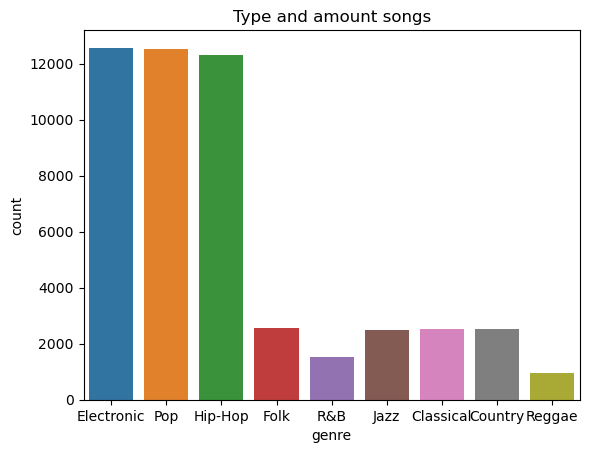

In [9]:
sns.countplot(data = data_df , x = 'genre', hue ='genre')
plt.title('Type and amount songs')

Text(0.5, 1.0, 'Language and amount songs')

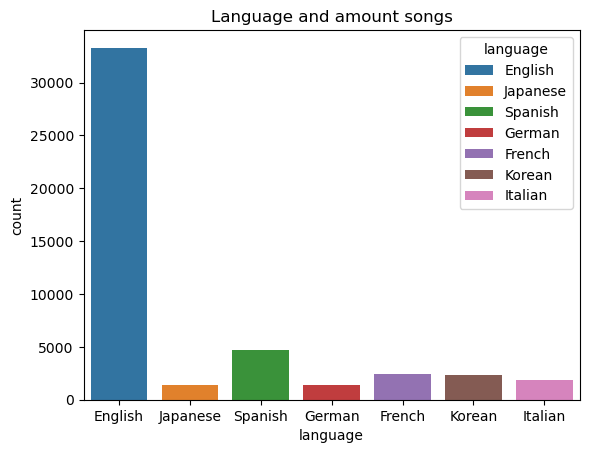

In [10]:
sns.countplot(data = data_df , x = 'language', hue ='language')
plt.title('Language and amount songs')

Text(0.5, 1.0, 'type songs of each language and amount songs')

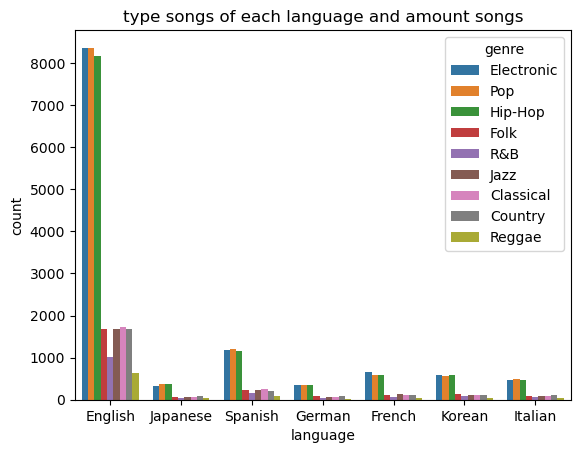

In [11]:
sns.countplot(data = data_df , x = 'language', hue ='genre')
plt.title('type songs of each language and amount songs')

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Def Jam'),
  Text(1, 0, 'Universal Music'),
  Text(2, 0, 'Sony Music'),
  Text(3, 0, 'Indie'),
  Text(4, 0, 'Atlantic Records'),
  Text(5, 0, 'Warner Music')])

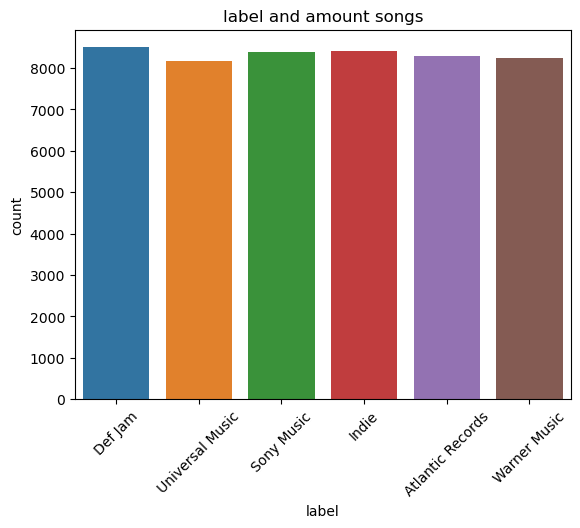

In [12]:
sns.countplot(data = data_df , x = 'label', hue ='label')
plt.title('label and amount songs')
plt.xticks(rotation = 45)

In [13]:
data_sort_english_df = data_df.sort_values(by=['popularity','language'], ascending = [False,True])

In [14]:
top100_english_songs_df = data_sort_english_df[(data_sort_english_df['language'] == 'English') & (data_sort_english_df['popularity'] == 100 )]

In [15]:
top100_english_songs_df.head()

,song_id,song_title,artist,album,genre,release_date,duration,popularity,stream,language,explicit_content,label,composer,producer,collaboration
81,SP0082,Every light how human.,Eric Baker,Past.,Pop,2014-09-27,158.0,100,42662587,English,Yes,Sony Music,Erin Watson,Alexander Kim,Ann Michael
137,SP0138,Whole probably hour.,Scott Hart,Medical.,Pop,2000-03-12,243.0,100,79997877,English,No,Def Jam,Angela Reynolds,Regina Roth,Joseph Gordon
181,SP0182,Heavy we media.,Joe Bradley,Thing guy.,Hip-Hop,2003-06-25,249.0,100,66625347,English,Yes,Def Jam,Joseph Brown,Brandi Paul,Carrie Jones
188,SP0189,Include story.,Terry Wheeler,Cultural indeed.,Hip-Hop,1997-04-22,239.0,100,48187445,English,No,Def Jam,Jennifer Edwards,Sheryl Martinez,NaN
510,SP0511,Husband in their.,Andrew Ramos,Create.,Hip-Hop,2023-08-02,NaN,100,67315317,English,Yes,Indie,James Spencer,Marissa Lawrence,Thomas Brooks


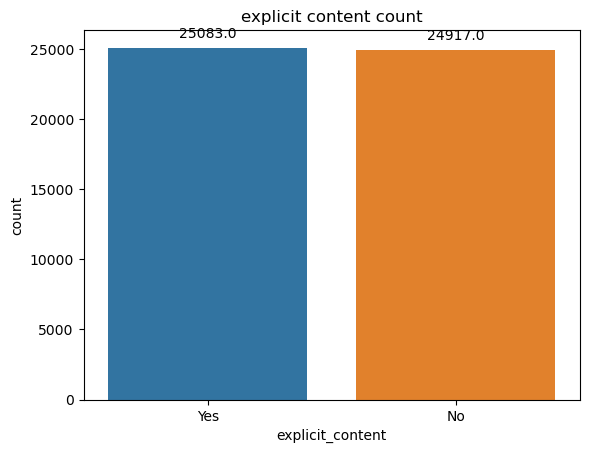

In [16]:
ax = sns.countplot(data = data_df , x = 'explicit_content', hue ='explicit_content')
plt.title('explicit content count');
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}',        
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom',        
                fontsize=10, color='black', xytext=(0, 5), textcoords='offset points') 
plt.show()

<Axes: xlabel='popularity', ylabel='stream'>

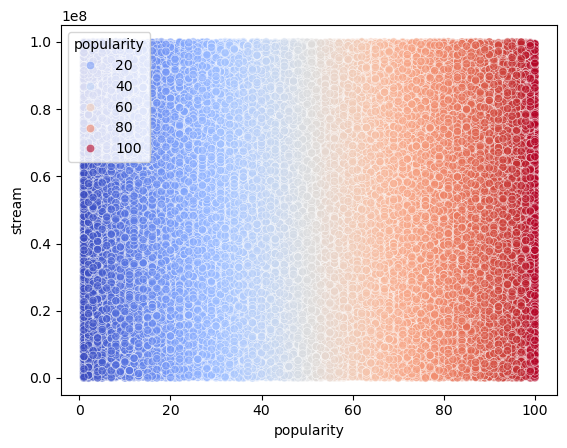

In [17]:
sns.scatterplot(data = data_df, x='popularity', y='stream',hue = 'popularity' ,palette='coolwarm', alpha=0.6)

## wordcloud

In [23]:
from wordcloud import WordCloud

In [28]:
data_df["collaboration"] = data_df["collaboration"].fillna("No Collaboration")
filtered_df = data_df[data_df['collaboration'] != "No Collaboration"]
all_artists = ', '.join(filtered_df['collaboration'].tolist())


In [30]:
wordcloud = WordCloud(width=800, height=400, 
                      background_color='white', 
                      contour_color='green', 
                      contour_width=1).generate(all_artists)

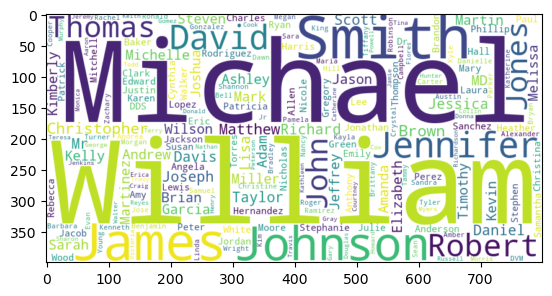

In [31]:
plt.imshow(wordcloud, interpolation='bilinear')

In [32]:
import numpy as np

In [33]:
from PIL import Image

In [34]:
mask = np.array(Image.open('./logo.png'))
mask = np.invert(mask)

# Identifying white areas on the mask
mask[mask > 128] = 255  # White areas
mask[mask <= 128] = 0 # Black areas

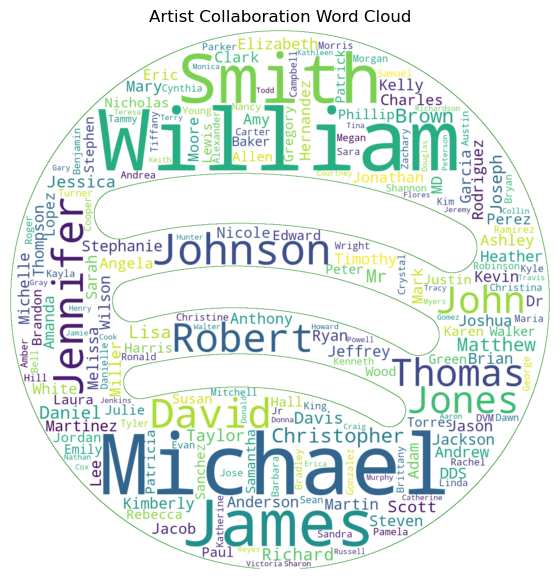

In [46]:
wordcloud = WordCloud(width=800, height=400, 
                      background_color='white', 
                      mask=mask, 
                      contour_color='green', 
                      contour_width=1).generate(all_artists)

# Showing
plt.figure(figsize=(7, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Artist Collaboration Word Cloud")
plt.show()

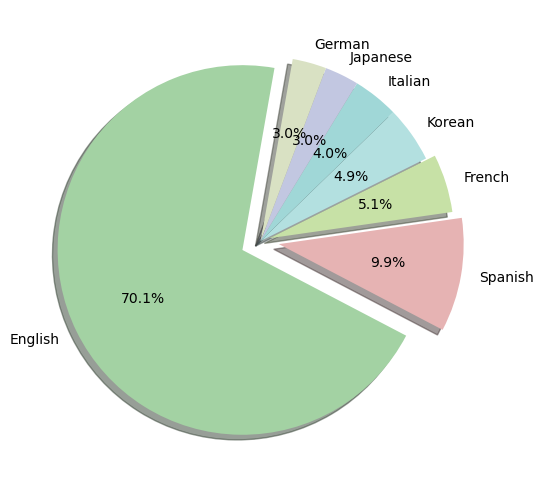

In [59]:
colors = ['#A3D2A3', '#E6B3B3', '#C7E1A6', '#B3E0E0', '#A0D7D7', '#C2C7E1', '#D9E1C3', '#A3C1AD', '#A2D6A6', '#B3E5BB']
language_count = data_df.language.value_counts()
language_count
plt.figure(figsize =(8,6))
plt.pie(language_count, 
       labels = language_count.index,
       autopct = '%1.1f%%',
       colors = colors, #màu từng lát 
       shadow = True,
       explode = [0.11, 0.1, 0.05, 0, 0, 0, 0],#mức độ bung ra của các lát cắt
       startangle = 80 #góc bắt đầu của biểu đồ
       );

In [18]:
#Song best of each artist
data_drop_dupli_df = data_df.sort_values('popularity', ascending=False).drop_duplicates(subset='artist')
data_drop_dupli_df.shape

(40182, 15)

In [19]:
feature_cols = data_df.columns.tolist()
def display_missing(df, feature_cols):
    n_rows = df.shape[0]
    for col in feature_cols:
        missing_count = df[col].isnull().sum()
        if missing_count>0:
            print(f"Col {col} has {missing_count*100/n_rows:.2f}% missing values.")
        else:
            print(f"Column {col} dont exist missing value")
display_missing(data_df, feature_cols)

Column song_id dont exist missing value
Column song_title dont exist missing value
Column artist dont exist missing value
Column album dont exist missing value
Column genre dont exist missing value
Column release_date dont exist missing value
Col duration has 10.00% missing values.
Column popularity dont exist missing value
Column stream dont exist missing value
Col language has 5.00% missing values.
Column explicit_content dont exist missing value
Column label dont exist missing value
Column composer dont exist missing value
Column producer dont exist missing value
Col collaboration has 70.00% missing values.


In [81]:

data_df['duration'] = data_df['duration'].fillna(data_df.groupby('artist')['duration'].transform('mean'))
data_df['duration'] = data_df['duration'].fillna(data_df['duration'].mean())

In [84]:
import numpy as np

In [86]:
#filnan collab
data_df['collaboration'] = np.where(data_df['collaboration'].isna(), 0, 1)

In [89]:
#filnan language by value 'other'
data_df['language'] = data_df['language'].fillna('Other')

In [90]:
feature_cols = data_df.columns.tolist()
def display_missing(df, feature_cols):
    n_rows = df.shape[0]
    for col in feature_cols:
        missing_count = df[col].isnull().sum()
        if missing_count>0:
            print(f"Col {col} has {missing_count*100/n_rows:.2f}% missing values.")
        else:
            print(f"Column {col} dont exist missing value")
display_missing(data_df, feature_cols)

Column song_id dont exist missing value
Column song_title dont exist missing value
Column artist dont exist missing value
Column album dont exist missing value
Column genre dont exist missing value
Column release_date dont exist missing value
Column duration dont exist missing value
Column popularity dont exist missing value
Column stream dont exist missing value
Column language dont exist missing value
Column explicit_content dont exist missing value
Column label dont exist missing value
Column composer dont exist missing value
Column producer dont exist missing value
Column collaboration dont exist missing value


In [91]:
data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_id           50000 non-null  object 
 1   song_title        50000 non-null  object 
 2   artist            50000 non-null  object 
 3   album             50000 non-null  object 
 4   genre             50000 non-null  object 
 5   release_date      50000 non-null  object 
 6   duration          50000 non-null  float64
 7   popularity        50000 non-null  int64  
 8   stream            50000 non-null  int64  
 9   language          50000 non-null  object 
 10  explicit_content  50000 non-null  object 
 11  label             50000 non-null  object 
 12  composer          50000 non-null  object 
 13  producer          50000 non-null  object 
 14  collaboration     50000 non-null  int32  
dtypes: float64(1), int32(1), int64(2), object(11)
memory usage: 5.5+ MB


In [39]:
data_df['release_date'] = pd.to_datetime(data_df['release_date'])

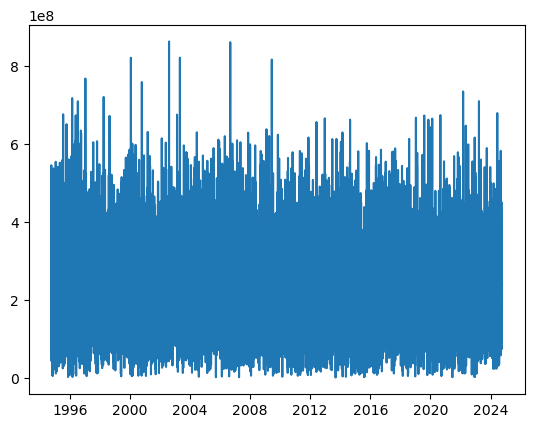

In [103]:
date_by_date = data_df.groupby(by='release_date')['stream'].sum().reset_index()
plt.plot(date_by_date['release_date'], date_by_date['stream'], label='date')

In [40]:
data_df['release_year'] = data_df['release_date'].dt.year

In [42]:
songs_per_year = data_df['release_year'].value_counts().sort_index()

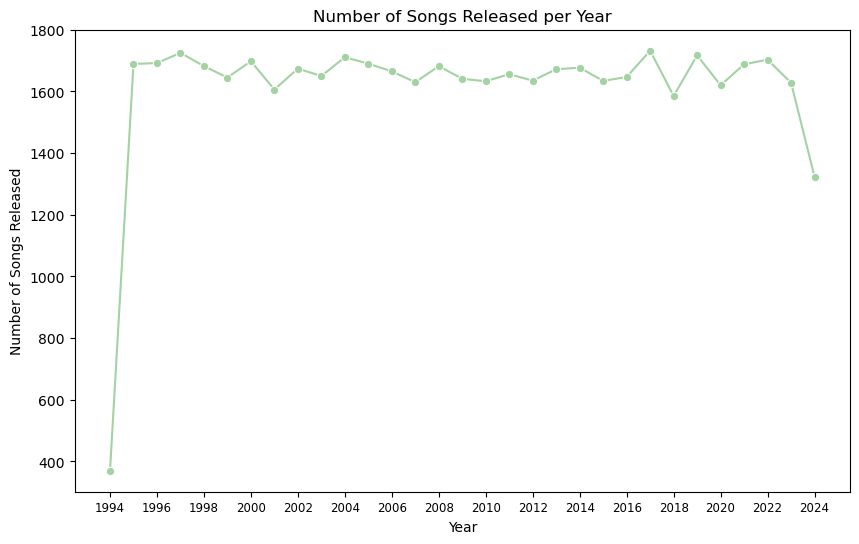

In [44]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=songs_per_year.index, y=songs_per_year.values, marker='o', color= '#A3D2A3')

plt.title('Number of Songs Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs Released')
plt.xticks(np.arange(data_df['release_year'].min(), data_df['release_year'].max()+1, 2), size= 8.5)

plt.show()

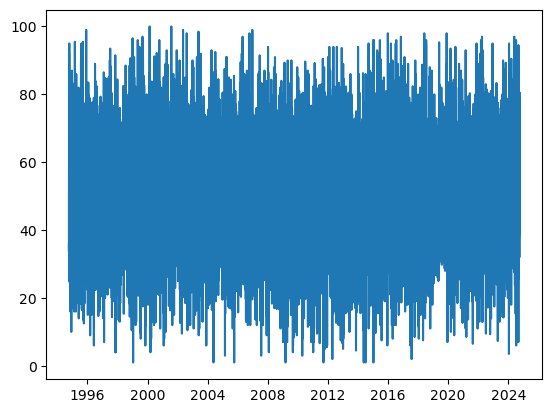

In [101]:
date_by_date = data_df.groupby(by='release_date')['popularity'].mean().reset_index()
plt.plot(date_by_date['release_date'], date_by_date['popularity'], label='date')

In [104]:
data_df.columns

Index(['song_id', 'song_title', 'artist', 'album', 'genre', 'release_date',
       'duration', 'popularity', 'stream', 'language', 'explicit_content',
       'label', 'composer', 'producer', 'collaboration'],
      dtype='object')

In [106]:
data_df["collaboration"] = data_df["collaboration"].astype("category")
data_df["language"] = data_df["language"].astype("category")
data_df["explicit_content"] = data_df["explicit_content"].astype("category")
data_df["genre"] = data_df["genre"].astype("category")
data_df["label"] = data_df["label"].astype("category")

In [107]:
X = data_df.drop(columns =['song_id','song_title','stream'])
y = data_df['stream']

In [108]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   artist            50000 non-null  object        
 1   album             50000 non-null  object        
 2   genre             50000 non-null  category      
 3   release_date      50000 non-null  datetime64[ns]
 4   duration          50000 non-null  float64       
 5   popularity        50000 non-null  int64         
 6   language          50000 non-null  category      
 7   explicit_content  50000 non-null  category      
 8   label             50000 non-null  category      
 9   composer          50000 non-null  object        
 10  producer          50000 non-null  object        
 11  collaboration     50000 non-null  category      
dtypes: category(5), datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 2.9+ MB


In [117]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split #tach test and train
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
for col in X.select_dtypes(include=['object', 'category']).columns:
    X[col] = le.fit_transform(X[col])

In [118]:
x_train, x_valid, y_train, y_valid = train_test_split(X,y,test_size = 0.2)

In [125]:
# Chuyển đổi cột 'release_date' thành số ngày kể từ 1970-01-01
x_train['release_date'] = (x_train['release_date'] - pd.Timestamp("1970-01-01")).dt.days


In [126]:
decision_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, random_state = 2022)# up depth
rf_model = decision_tree.fit(x_train,y_train)

In [128]:
x_valid['release_date'] = (x_valid['release_date'] - pd.Timestamp("1970-01-01")).dt.days

In [130]:
y_preds = decision_tree.predict(x_valid.head(50))

In [131]:
y_preds, y_valid[:50]

(array([   78,    24,    14,    63,    13,    23,    24,    23,    62,
        27010,    23, 27010, 15033,     5,    10,    18,    10,    23,
           14,    19,    31,    14,    15,    78,    15,     4,  3536,
           30, 31878,    24,    13,    23,    31,    30,    14, 31280,
        31878,     3,    78,    31,   151,    31,    10,     4,    13,
            0,    30,    62, 15033,    47], dtype=int64),
 array([31772, 22455, 32227, 42030,  4644, 12022, 44708, 29761, 34495,
        32284, 41376, 34742, 39208,  4928, 44020,  3710, 47864, 42056,
        15326, 26016, 17306, 13863,  4019, 15796, 48064, 19023, 34939,
        21842, 18828, 23889, 16535, 41016, 26977, 47655,  5636, 39227,
        17548, 37544,  1145, 10323, 19908,  7926, 35157,  3189,  3349,
         8002, 24650, 24115,  4425, 12564], dtype=int64))